# Análise sentimento climate NLP

In [1]:
# Versão do python 
from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.8.8


In [3]:
# Importação das bibliotecas 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as m
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

warnings.filterwarnings("ignore")

In [2]:
# NLTK para NLP
import nltk
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# Versões das bibliotecas

%reload_ext watermark
%watermark -a "Rafael Gallo" --iversions

Author: Rafael Gallo

re        : 2.2.1
numpy     : 1.20.1
pandas    : 1.2.4
nltk      : 3.6.1
matplotlib: 3.3.4
seaborn   : 0.11.1
sys       : 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]



In [5]:
# Configuração dos gráficos

sns.set_palette("Accent")
sns.set(style="whitegrid", color_codes=True, font_scale=1.5)
color = sns.color_palette()

# Base dados

In [8]:
# Carregando a base de dados
df = pd.read_csv("twitter_sentiment_data.csv")
df

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153
...,...,...,...
43938,1,"Dear @realDonaldTrump,\nYeah right. Human Medi...",791307031919550464
43939,1,What will your respective parties do to preven...,791316857403936768
43940,2,RT @MikkiL: UN Poll Shows Climate Change Is th...,791357509101621249
43941,0,RT @taehbeingextra: i still can$q$t believe th...,791390042136641537


In [7]:
# Exibido 5 primeiros dados
df.head()

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [9]:
# Exibido 5 últimos dados 
df.tail()

,sentiment,message,tweetid
43938,1,"Dear @realDonaldTrump,\nYeah right. Human Medi...",791307031919550464
43939,1,What will your respective parties do to preven...,791316857403936768
43940,2,RT @MikkiL: UN Poll Shows Climate Change Is th...,791357509101621249
43941,0,RT @taehbeingextra: i still can$q$t believe th...,791390042136641537
43942,1,@Likeabat77 @zachhaller \n\nThe wealthy + foss...,791401610308038656


In [10]:
# Verificando informações das variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43943 entries, 0 to 43942
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  43943 non-null  int64 
 1   message    43943 non-null  object
 2   tweetid    43943 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


In [11]:
# Número de linhas e colunas
df.dtypes

sentiment     int64
message      object
tweetid       int64
dtype: object

In [12]:
# Total de colunas e linhas 

print("Números de linhas: {}" .format(df.shape[0]))
print("Números de colunas: {}" .format(df.shape[1]))

Números de linhas: 43943
Números de colunas: 3


In [13]:
# Exibindo valores ausentes e valores únicos

print("\nMissing values :  ", df.isnull().sum().values.sum())
print("\nUnique values :  \n",df.nunique())


Missing values :   0

Unique values :  
 sentiment        4
message      41033
tweetid      43943
dtype: int64


In [14]:
# Verificando a sentimento
df.sentiment.value_counts()

 1    22962
 2     9276
 0     7715
-1     3990
Name: sentiment, dtype: int64

In [15]:
# Verificação contagem de texto
df.value_counts()

sentiment  message                                                                                                                                         tweetid           
-1         #BillNye Grade school science guy spreading lie of climate change #CNN donna doesn't match truth does… https://t.co/zi4lfot0ru                  855766326614294528    1
 1         RT @jtotheizzoe: I guess climate change, the most critical issue facing us and every 👱👩and 👶 on Earth, will to have to wait for 2020 🔥🌎😔 #d…    788929874115166208    1
           RT @jswatz: For those of you swarming in to say that climate change is a hoax, here's a good primer from @JustinHGillis https://t.co/sfp2fRâ€¦  956223386480504832    1
           RT @jswatz: For those who saw a sign of moderated views on climate change in E.P.A. chief Pruitt's confirmation hearing: uh, no. https://t.…    839912605858803716    1
           RT @jswatz: Mesmerizing: See how climate change and human action alter the landscape. @dwtkns @henr

In [16]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment,43943.0,8.539244e-01,8.535434e-01,-1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
tweetid,43943.0,8.367966e+17,8.568506e+16,5.926334e+17,7.970376e+17,8.402301e+17,9.020003e+17,9.667024e+17


In [17]:
# Contagem de sentimento na base de dados
df.sentiment.count()

43943

In [18]:
# Retirando palavras duplicadas
df.drop_duplicates(["message"], inplace = True)
df.message.count()

41033

# Análise dados

Text(0, 0.5, 'Total')

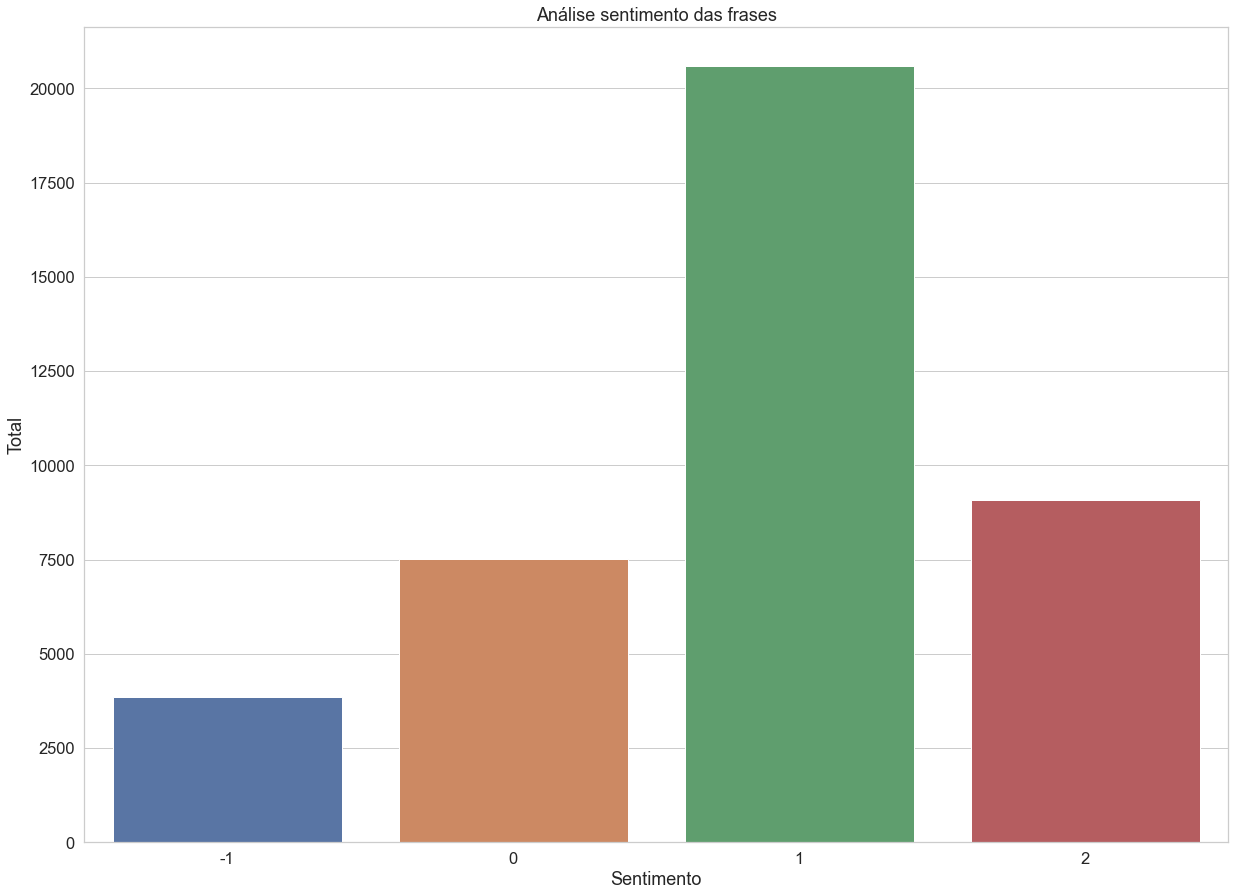

In [19]:
# Gráfico de Análise sentimento

plt.figure(figsize=(20.5,15))

plt.title("Análise sentimento das frases")
ax = sns.countplot(df["sentiment"])
plt.xlabel("Sentimento")
plt.ylabel("Total")

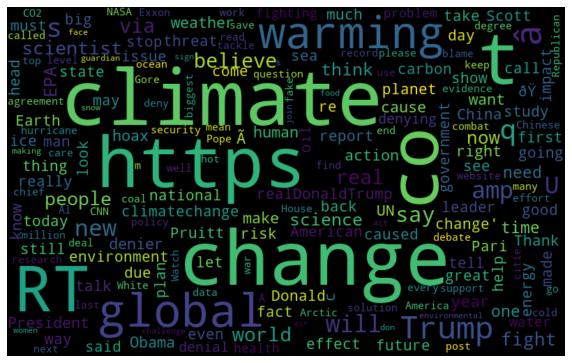

In [20]:
%matplotlib inline
from wordcloud import WordCloud

todos_palavras = ' '.join([message for message in df["message"]])
nuvem_palavras = WordCloud(width = 800, height = 500, max_font_size = 110,
                          collocations = False).generate(todos_palavras)

plt.figure(figsize= (10, 7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [21]:
# Definindo os dados para análise

df = df[['sentiment', 'message']]
df.head()

,sentiment,message
0,-1,@tiniebeany climate change is an interesting h...
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...
3,1,RT @Mick_Fanning: Just watched this amazing do...
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ..."


In [25]:
# Análise de sentimento nas frases

# Importando a biblioteca vader sentiment, sentiment intensity analyzer
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Modelo da análise de sentimento
model = SentimentIntensityAnalyzer()

# Função das frases
def data_model(df):
    
    # Modelo polaridade e score das frases
    model_set = model.polarity_scores(df) 
    
    # Print análise de sentimento
    print("{:-<40} {}".format(df, str(model_set)))

# Verificando sentimento
data_model("Earth's climate is very bad, the government is not helping") 

Earth's climate is very bad, the government is not helping {'neg': 0.415, 'neu': 0.585, 'pos': 0.0, 'compound': -0.6889}


In [23]:
# Criando o análisado de sentimento
%time

x = 0

# Modelo
model_1 = []

# Lendo os dados do score
while(x<len(df)):
    
    # Modelo
    y = model.polarity_scores(df.iloc[x]['message'])
    
    # Armazenando no modelo
    model_1.append(y["compound"])
    x = x + 1
    
# Adicionando no array 
model_1 = np.array(model_1)

# Lendo o total de frases do modelo
len(model_1)

# Score do modelo

df["Score_vader"] = model_1
df.head(20)

Wall time: 0 ns


,sentiment,message,Score_vader
0,-1,@tiniebeany climate change is an interesting h...,0.6428
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,0.0000
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,0.8544
3,1,RT @Mick_Fanning: Just watched this amazing do...,0.6705
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",-0.2732
5,0,Unamshow awache kujinga na iko global warming ...,0.1531
7,2,RT @CCIRiviera: Presidential Candidate #Donald...,0.0000
8,0,RT @AmericanIndian8: Leonardo DiCaprio's clima...,0.5106
9,1,#BeforeTheFlood Watch #BeforeTheFlood right he...,0.0000
10,1,RT @DrDeJarnett: It's vital that the public he...,0.2960


In [24]:
%time

x = 0

# Adicionando uma list
pred = []

# Definindo sentimento positivo
while(x<len(df)):
    if ((df.iloc[x]["Score_vader"] >= 0.7)):
        pred.append("Positivo")
        x = x + 1
    
    # Definindo sentimento neutro
    elif((df.iloc[x]["Score_vader"] > 0) & (df.iloc[x]["Score_vader"] < 0.7)):
        pred.append("Neutro")
        x = x + 1
    
    # Definindo sentimento negativo
    elif ((df.iloc[x]["Score_vader"] <= 0)):
        pred.append("Negativo")
        x = x + 1

# Visualizando a análise de sentimento
df["Previsão"] = pred
len(df['Previsão'])

# Visualizando total de sentimentos
df.head(50)

Wall time: 0 ns


,sentiment,message,Score_vader,Previsão
0,-1,@tiniebeany climate change is an interesting h...,0.6428,Neutro
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,0.0000,Negativo
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,0.8544,Positivo
3,1,RT @Mick_Fanning: Just watched this amazing do...,0.6705,Neutro
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",-0.2732,Negativo
5,0,Unamshow awache kujinga na iko global warming ...,0.1531,Neutro
7,2,RT @CCIRiviera: Presidential Candidate #Donald...,0.0000,Negativo
8,0,RT @AmericanIndian8: Leonardo DiCaprio's clima...,0.5106,Neutro
9,1,#BeforeTheFlood Watch #BeforeTheFlood right he...,0.0000,Negativo
10,1,RT @DrDeJarnett: It's vital that the public he...,0.2960,Neutro
